In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib
from matplotlib import pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
#1.1
N = 1000

#defining variables
x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = x2 + 2*x1
data = np.stack((x1,x2,x3))

In [3]:
#1.2) 1.3)
#computing the covariance matrix of data 
cov = np.cov(data)

#computing the eigen valueas and vectors of Cov(data) matrix
#first by using the built-in function of linalg 
l, V = la.eig(np.cov(data))
print('Eigen valueas and vectors of Cov(data) matrix computing by built-in function of linalg library ')
print('Eigenval\n', l)
print('Eigenvec\n', V)

#now let's compute the same by using the SVM method 
U, D, Vt = la.svd(data)
print('\n \nEigen valueas and vectors of Cov(data) matrix computing by SVM method')
print('Eigenval\n',D**2/(N-1))
print('Eigenvec\n', U)


Eigen valueas and vectors of Cov(data) matrix computing by built-in function of linalg library 
Eigenval
 [ 2.71577513e+01+0.j -1.31105511e-15+0.j  1.93361659e+00+0.j]
Eigenvec
 [[-0.11594837 -0.81649658  0.56558758]
 [-0.57675211 -0.40824829 -0.70759475]
 [-0.80864886  0.40824829  0.4235804 ]]

 
Eigen valueas and vectors of Cov(data) matrix computing by SVM method
Eigenval
 [2.71909929e+01 1.93460011e+00 7.70882513e-32]
Eigenvec
 [[-0.1160765   0.5655613  -0.81649658]
 [-0.5765918  -0.70772539 -0.40824829]
 [-0.80874479  0.4233972   0.40824829]]


The first two components of PCA can describe up to 100.0% of the information


/Users/giacomo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/giacomo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


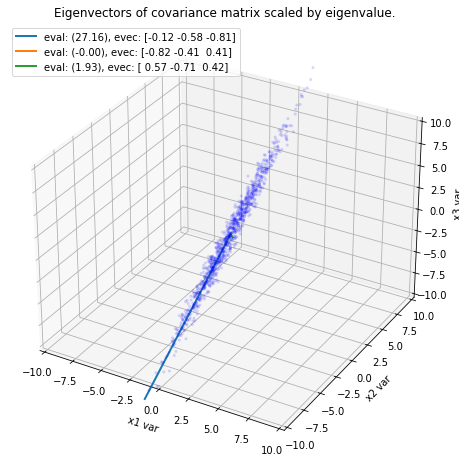

In [4]:
#1.4
#recomputing eig of covariance 
l, V = la.eig(np.cov(data))

# plotting the data (again)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)
ax.set_xlabel('x1 var')
ax.set_ylabel('x2 var')
ax.set_zlabel('x3 var')
ax.set_title('Eigenvectors of covariance matrix scaled by eigenvalue.')
ax.scatter(data[0,:], data[1,:], data[2,:], alpha = 0.1, s = 5, c='b')

# drawing each eigenvector
scale = 0.6
for li, vi in zip(l, V.T):
    # the line is defined by means of its beginning and its end 
    ax.plot([0, scale*li*vi[0]],[0, scale*li*vi[1]], [0, scale*li*vi[2]], label= f'eval: ({np.real(li):.2f}), evec: {np.around(vi,2)}', lw=2 )

#showing legend on the plot
ax.legend()
    
#we can estimate the "information stored" in the first 2 principal component 
#assuming that the sum of all eigenvalues of the covariance matrix define de 100% of information
tot_inf = np.real(np.sum(l))
l_sort = l.sort()
PCA_inf = np.real((l[1] + l[2])*100)/tot_inf

print(f'The first two components of PCA can describe up to {(PCA_inf)}% of the information')


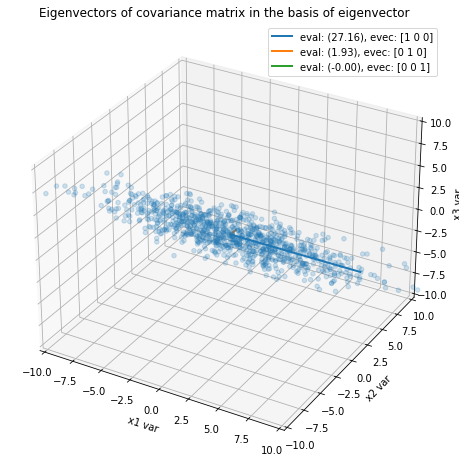

In [5]:
# rotate all the data points accordingly to the new base
data_p = np.dot(V.T, data)

# then plot the rotated dataset and its "axes"
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)
ax.set_xlabel('x1 var')
ax.set_ylabel('x2 var')
ax.set_zlabel('x3 var')
ax.set_title('Eigenvectors of covariance matrix in the basis of eigenvector')
ax.scatter(data_p[0,:], data_p[1,:],data_p[2,:], alpha=0.2)


#fixing some problem for the plot
l_swapped = l.copy()
l_swapped[0] = l[2]
l_swapped[2] = l[0]

scale=0.4
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l_swapped, np.diag([1]*3)):
    ax.plot([0, scale*li*vi[0]],
                    [0, scale*li*vi[1]], 
                    [0, scale*li*vi[2]], label= f'eval: ({np.real(li):.2f}), evec: {np.around(vi,2)}', lw=2 )
ax.legend()


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [6]:
#in progress

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


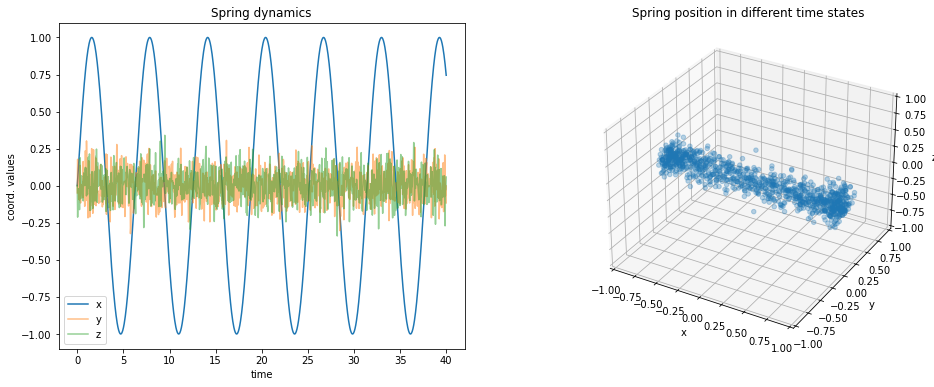

In [7]:
#defining spring parameter for the dynamics simulation
time = np.linspace(0,40,1000)
omega = 1
phi = 0
spring_x = np.array(np.sin(omega*time + phi))
spring_y = np.random.normal(0,0.1,len(time))
spring_z = np.random.normal(0,0.1,len(time))

#plotting the dynamics 
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(time, spring_x, label = 'x')
ax1.plot(time, spring_y, alpha = 0.5, label = 'y')
ax1.plot(time, spring_z, alpha = 0.5, label = 'z')
ax1.set_title('Spring dynamics')
ax1.set_xlabel('time')
ax1.set_ylabel('coord. values')
ax1.legend()

ax2 = fig.add_subplot(1,2,2, projection= '3d')
ax2.scatter(xs= spring_x, ys= spring_y, zs = spring_z, alpha = 0.3)
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)
ax2.set_zlim(-1,1)
ax2.set_title('Spring position in different time states')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

X = np.stack((spring_x,spring_y, spring_z))

In [8]:
#now let's define the 3d rotation function.
#this allow us to create new datapoints just roteating our original dataset.

def space_rotation(theta,X):
    #data rotation around x axis 
    x_rotation = np.array([ [1, 0, 0],
                            [0,np.cos(theta), -np.sin(theta)],
                            [0,np.sin(theta), np.cos(theta)]])
    
    #data rotation around x axis
    y_rotation = np.array([ [np.cos(theta), 0, np.sin(theta)],
                            [0, 1, 0],
                            [-np.sin(theta), 0, np.cos(theta)]])

    #data rotation around y axis 
    z_rotation = np.array([ [np.cos(theta), -np.sin(theta), 0],
                            [np.sin(theta), np.cos(theta), 0],
                            [0, 0, 1]])
    
    X = np.dot(x_rotation, np.dot(y_rotation,np.dot(z_rotation.T,X)))
    
    return X



n = 7 #number of 'cameras'
theta = np.linspace(0,2*np.pi, n) #angle of the cameras 

for th in range(len(theta)):
    Y = space_rotation(theta[th],X[:,0:1000])
    X = np.concatenate((X,Y), axis=1)


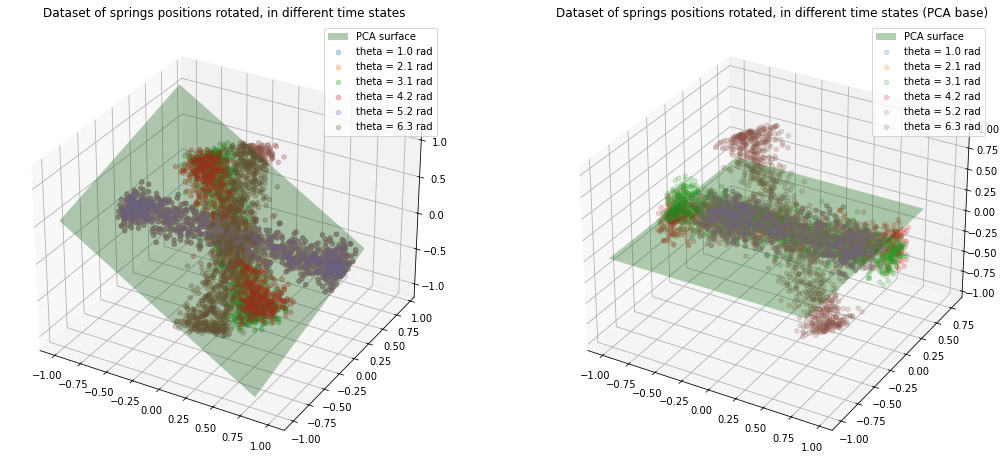

In [23]:
#in this cell we want to compute the PCA and plot the data 
#focusing in the first two components of PCA 


#first of all we compute the cov matrix
Xcov = np.cov(X)
l, V = np.linalg.eig(np.cov(Xcov))

#then we redefine the dataset in the base of 
#PCA
Xp = np.dot(V.T, X)

#now we want to create the surface in order to visualize the first proncipal component 
#the way i choose is to compute a meshgrid and computing the Z
first_vector = V[:, 0]      #PC 1
second_vector = V[:, 1]     #PC 2
x = np.arange(-1, 1, 0.2)   
y = np.arange(-1, 1, 0.2)
xx, yy = np.meshgrid(x, y)  
zz = first_vector[0]*xx + second_vector[0]*yy


#now we are ready to plot the dataset in the two different basis
fig = plt.figure(figsize=(18,8))

#first plot original dataset
ax1 = fig.add_subplot(1,2,1,projection = '3d')
ax1.set_title('Dataset of springs positions rotated, in different time states')
ax1.plot_surface(X=xx,Y=yy,Z=zz, alpha = 0.3, color = 'green', label = 'PCA surface')
for th in range(1,len(theta)):
    ax1.scatter(
        xs = X[0,(th-1)*1000:th*1000], 
        ys = X[1,(th-1)*1000:th*1000], 
        zs = X[2,(th-1)*1000:th*1000], alpha=0.3, label = f'theta = {round(theta[th],1)} rad')
ax1.legend()

#second plot dataset in PCA base 
ax2 = fig.add_subplot(1,2,2,projection = '3d')
ax2.set_title('Dataset of springs positions rotated, in different time states (PCA base)')
zz = xx - xx #recomputing the Z coord
ax2.plot_surface(X=xx,Y=yy,Z=zz, alpha = 0.3, color = 'green', label = 'PCA surface')
for th in range(1,len(theta)):
    ax2.scatter(
        xs = Xp[0,(th-1)*1000:th*1000], 
        ys = Xp[1,(th-1)*1000:th*1000], 
        zs = Xp[2,(th-1)*1000:th*1000], alpha=0.2, label = f'theta = {round(theta[th],1)} rad')
ax2.legend()




4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [10]:
path = '/Users/giacomo/data/magic04.data'

In [11]:
import pandas as pd
data = pd.read_csv(path, sep=',')

print('dataset loades')

In [12]:
#drop non numerical data 
data = data.drop(data.columns[10], axis=1)
data

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980
...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [13]:
#same as before 
cov = np.cov(data.T)
l, V = la.eig(cov)

(10, 10)


In [20]:
for i in range(1,len(l)):
    accuracy = round(np.real(np.sum(l[0:i])*100/np.sum(l)),2)
    print(f'\ndataset descriprion accuracy with {i} principal components', accuracy)
 


dataset descriprion accuracy with 1 principal components 44.04

dataset descriprion accuracy with 2 principal components 69.84

dataset descriprion accuracy with 3 principal components 83.34

dataset descriprion accuracy with 4 principal components 92.23

dataset descriprion accuracy with 5 principal components 96.31

dataset descriprion accuracy with 6 principal components 99.21

dataset descriprion accuracy with 7 principal components 100.0

dataset descriprion accuracy with 8 principal components 100.0

dataset descriprion accuracy with 9 principal components 100.0
